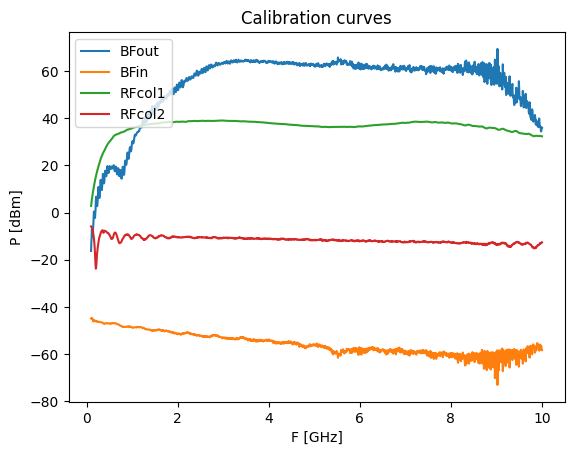

In [1]:
import matplotlib.pyplot as plt
from calibration import read_txt
import numpy as np
import vna
from scipy.interpolate import interp1d
%matplotlib widget

In [ ]:
BFout = np.load('calibration files/BFout.npy')
BFin = np.load('calibration files/BFin.npy')
RFout = np.load('calibration files/RFout.npy')
bfout = interp1d(BFout[:, 0], BFout[:, 1])
bfin = interp1d(BFin[:, 0], BFin[:, 1])
rfout = interp1d(RFout[:, 0], RFout[:, 1])

In [ ]:
fstop = 8  # GHz
fstart = 4  # GHz
totscanbw = fstop - fstart
num_points = 101
subscanbw = 0.1  # GHz
num_subscans = int(np.ceil(totscanbw / subscanbw))
realfstart = fstart
realfstop = fstart + num_subscans * subscanbw
f0start = realfstart + subscanbw / 2
kidpower = -110
ifbw = 10000  # Hz

In [ ]:
print(num_subscans)
for i in range(num_subscans):
    print(i)
    f0 = f0start + i*subscanbw
    KID_cryoOUt = bfout(f0)
    GainRFbox = rfout(f0)
    PcryoOUt = kidpower + KID_cryoOUt + GainRFbox
    PVNAin = PcryoOUt + 2
    if PVNAin > 62:
        PVNAin = 62
        print('PVNAin > 62')
    elif PVNAin < 2:
        PVNAin = 2
        print('PVNAin < 2')
    weinschell = np.round(PVNAin / 2) * 2
    vna.set_weinschell(weinschell)
    KID_cryoIn = bfin(f0)
    vna_power = kidpower - KID_cryoIn 
    freqs, s21 = vna.get_s21(f0, subscanbw, num_points, vna_power, ifbw)
    vna.plot_s21(freqs, s21)



In [2]:
freqs, s21 = vna.get_s21(6, 4, 101, -110, 10000)
print(s21)


Connected to VNA: Agilent Technologies,N5230A,MY45000109,A.06.04.32



In [ ]:
vna.plot_s21(freqs, s21)